In [1]:
import pandas as pd
import seaborn as sns # visualizing distribution
import matplotlib.pyplot as plt
import datetime as td  # datatime 
import sklearn

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

Q1. Downloading the data

In [3]:
# We are using the Yellow Taxi Trip Record of the NYC taxi dataset
# Download the data for January and February 2023


# Question: Read the data for January. How many columns are there?

In [4]:
# Download and read the data for January 2023
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet') 

In [5]:
# Read the first 5 rows of the data 
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
# How many columns are there?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Q2. Computing duration

In [7]:
# Now let's compute the duration variable. It should contain the duration of a ride in munites.

# Question: What's the standard deviation of the trip duration in January?

# Duration = dropoff - pickup



In [8]:
# I created an additional column called duration. And that holds the result of the duration calculation
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime 


In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [10]:
# Now looking at the duration variable we can't use the value as it is in our ML model so we have to convert the duration variable 
# into minutes. More so, the question asks us to calculate duration in minutes. so let's transform the duration value to minute. 
# To convert a time into total minutes in Python, you can use different approaches depending on the time input format. 
# So we used the datetime (td) library to do the conversion: "td.total_seconds() / 60" and use "lambda function" to apply it to every row 
# 


df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


In [11]:
# Now time to calculate the standard deviation. 
# Calculating the standard deviation in Python can be done using different libraries, depending on your requirements. The most common libraries 
# used for this purpose are statistics, numpy, and pandas. In this homework, I am going to use pandas

std_dev = df['duration'].std()
print("Standard Deviation:", std_dev)

Standard Deviation: 42.594351241920904


Q3. Dropping outliers

/tmp/ipykernel_50687/3378493960.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Density'>

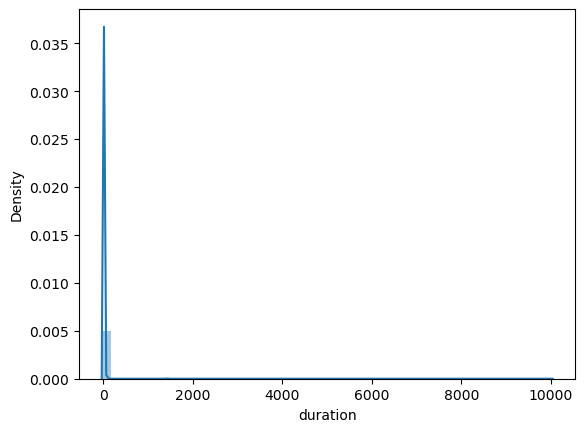

In [12]:

# Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records
# where the duration is between 1 and 60 minutes inclusive. Thus, [(df.duration >=1) & (duration <=60)]

#Question: What fraction of the records left after you dropped the outliers?

# Let us the "sns" to visualise the distribution of duration before dropping the outliers

sns.distplot(df.duration)

In [13]:

# Fraction of records left after dropping the outliers
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9812202822125979

In [14]:
# Cleaned data, free from outliers

df = df[(df.duration >= 1) & (df.duration <= 60)]

/tmp/ipykernel_50687/679230665.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Density'>

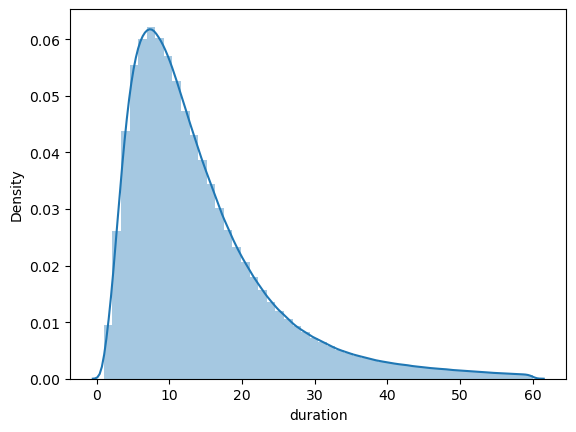

In [15]:

# Let us visualise the distribution of duration after dropping the outliers

sns.distplot(df.duration)

Q4. One-hot encoding

In [16]:
# Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.
#* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings-otherwise it will label encode them)
#* Fit a dictionary vectorise
#* Get a feature matrix from it 

# Question: What is the dimensionality of this matrix (number of columns)?

In [17]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [18]:
categorical = ['PULocationID', 'DOLocationID'] #Extract categorical columns

In [19]:

# let's convert the categorical variables from integer to string before we convert to dictionary format. But, make sure you check the variable type

df[categorical] = df[categorical].astype(str)

In [20]:
df[categorical].iloc[:5].to_dict(orient = 'records') # Convert first 5 row to dictionary format, to see how it appear

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'}]

In [21]:
# Let apply the conversion to dictionary format to the entire dataset and call it train_dicts

train_dicts = df[categorical].to_dict(orient = 'records') #

In [22]:
# Initialize the DictVectorizer

dv = DictVectorizer() 


In [23]:
# Fit the DictVectorizer on the training data

X_train = dv.fit_transform(train_dicts)

In [24]:
# Get the dimension of the X_train matrix (number of columns)
X_train.shape

(3009173, 515)

Q5. Training a model

In [25]:
# Now let's use the feature matrix from the previous step to train a model 
# * Train a plain linear regression model with default parameters, where duration is response variable
# * Calculate the RMSE of the model on the training data

# Question: What's the RMSE on train?

In [26]:
# We set out target variable

response = 'duration'
y_train = df[response].values

In [27]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [28]:
# Now we have our y-variable(y_train) and x-variable(X_train). let's import the LinearRegression model from sklearn and set the model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_train) 

/tmp/ipykernel_50687/2510689393.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'prediction')
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_50687/2510689393.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level

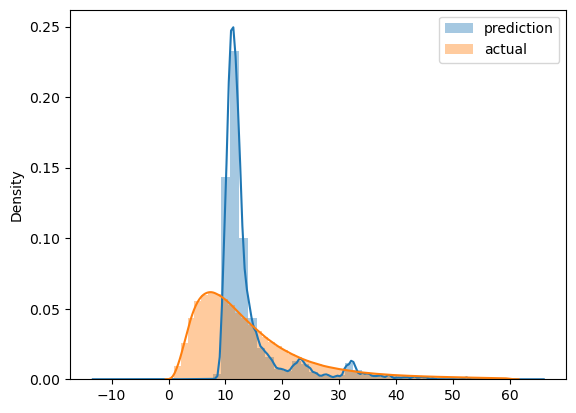

In [30]:
# Let's visualise to see the prediction and actual

sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()


In [31]:
# RMSE 
# Let import metrics for evaluating the performance of the model from sklearn

mean_squared_error(y_train, y_pred, squared = False)

7.649261930819891

Q6. Evaluating the model 

In [34]:
# Now let's apply this model to the validation dataset (February 2023)

# Question: What's the RMSE on validation


In [36]:
# Lets download the training (January) and the that validation data (February)

df_train = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet') 
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet') 

In [37]:
# Now let's put all the above process together

# Training data 
df_train['duration'] = df_train.tpep_dropoff_datetime - df_train.tpep_pickup_datetime 
df_train.duration = df_train.duration.apply(lambda td: td.total_seconds() / 60)
    
df_train = df_train[(df_train.duration >= 1) & (df_train.duration <= 60)]
    
categorical = ['PULocationID', 'DOLocationID']
df_train[categorical] = df_train[categorical].astype(str)


# validation data

df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime 
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)
    
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]
    
categorical = ['PULocationID', 'DOLocationID']
df_val[categorical] = df_val[categorical].astype(str)


In [38]:
len(df_train), len(df_val)

(3009173, 2855951)

In [40]:


dv = DictVectorizer() 

# For training
train_dicts = df_train[categorical].to_dict(orient = 'records') #convert to dictionary format

X_train = dv.fit_transform(train_dicts) # Fit the DictVectorizer on the training data

# For validation

val_dicts = df_val[categorical].to_dict(orient = 'records') #convert to dictionary format

X_val = dv.transform(val_dicts) # Now transform the validation data


In [41]:
# We prepare the target variable

response = 'duration'
y_train = df_train[response].values

response = 'duration'
y_val = df_val[response].values

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared = False)

7.811817675774269